# Lab: Basic feature selection

**Author**: J. Hickman

**Instructions** 

* Read and work through all tutorial content and do all exercises below
* Note plots and expected outputs are included for reference 

**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

---
format:
    html:
        embed-resources: true
---

# Theory: 

Correlation feature selection

The correlation feature selection (CFS) measure evaluates subsets of features on the basis of the following hypothesis: 

**"Good feature subsets contain features highly correlated with the output, yet uncorrelated to each other".**

The following equation gives the "merit" of a subset of features S consisting of k features:

$$ \mathrm {Merit} _{S_{k}}={\frac {k|{\overline {r_{cf}}|}}{\sqrt {k+k(k-1)|{\overline {r_{ff}}}|}}}  $$

$\overline{r_{xy}}$ is the average value of all input-output (feature-target) correlations (either Pearson or Spearman)

$\overline{r_{xx}}$ is the average value of all input-input (feature-feature) correlations (either Pearson or Spearman)


**Note**: The vertical lines denote absolute values 

**The subset of features S which maximizes the figure of merit, is in theory an optimal feature set**

Content source: modified from the following link(s)
* https://en.wikipedia.org/wiki/Feature_selection


**Spearman's rank correlation**

Spearman's rank correlation measures the strength and direction of association between two ranked variables. 

It basically gives the measure of monotonicity of the relation between two variables 

i.e. How well the relationship between two variables could be represented using a monotonic function.

**Monotonic**: varying in such a way that it either never decreases (always increasing) or never increases (always decreasing).


# Figure of merit 


### Import packages

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn 


The following are a few representative values of the merit score  

In [2]:
# EXAMPLE-1: (8 Features: Un-correlated X-X with correlated X-Y))
k=8
rho_xx=0
rho_xy=1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 8
merit = 2.82842712474619


In [3]:
# EXAMPLE-2: (1 Features: Un-correlated X-X with correlated X-Y)
k=1
rho_xx=0
rho_xy=1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 1
merit = 1.0


In [4]:
# EXAMPLE-2: (8 Features: Un-correlated X-X with anti-correlated X-Y)
k=8
rho_xx=0
rho_xy=-1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 8
merit = 2.82842712474619


In [5]:
# EXAMPLE-2: (4 Features: partially-correlated X-X with anti-correlated X-Y)
k=4
rho_xx=0.5
rho_xy=-1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 4
merit = 1.0690449676496976


### ASSIGNMENT-1: 

* Complete the function below to compute the figure of merit given a subset of features

* Code should work for both the Pearson and Spearman correlation matrix 

**Note**: Ideally, the average should be computed with the terms on the upper-triangle of the correlation matrix.

This will remove the self-correlation terms on the main diagonal, however, this is not strictly necessary  

In [ ]:
def merit(x,y,correlation="pearson"):
    # x=matrix of features 
    # y=matrix (or vector) of targets 
    
    # Calculate the correlation between features and the target variable
    if correlation == "pearson":
        corr_xy = np.corrcoef(x, y, rowvar=False)[-1, :-1]
    elif correlation == "spearman":
        corr_matrix = pd.DataFrame(np.c_[x, y]).corr(method='spearman')
        corr_xy = corr_matrix.iloc[:-1, -1].values
    else:
        raise ValueError("Invalid correlation type. Choose 'pearson' or 'spearman'.")

    # Calculate the correlation matrix for features 
    if correlation == "pearson":
        corr_xx = np.corrcoef(x, rowvar=False)
    elif correlation == "spearman":
        corr_xx = pd.DataFrame(x).corr(method='spearman').values

    # Extract the upper triangle of the correlation matrix
    k = x.shape[1]
    upper_tri_indices = np.triu_indices(k, k=1)
    mean_rho_xx = np.mean(np.abs(corr_xx[upper_tri_indices]))

    # Calculate the average correlation between features and the target variable
    mean_rho_xy = np.mean(np.abs(corr_xy))

    # Compute the merit score using the provided formula
    merit_score = (k * mean_rho_xy) / (np.sqrt(k + k * (k - 1) * mean_rho_xx))
    
    return merit_score

# Test example
x = np.random.rand(100, 4)  # Generate a random matrix with 100 samples and 4 features
y = np.random.rand(100)     # Generate a random vector with 100 target values

print("Merit (Pearson):", merit(x, y, correlation="pearson"))
print("Merit (Spearman):", merit(x, y, correlation="spearman"))

Merit (Pearson): 0.17951618701277627
Merit (Spearman): 0.19173351032727592


### Generate data

Run the following code to test your Merit function

In [ ]:
#GENERATE INTENTIONALLY CORRELATED DATA
N = 100
x = np.zeros((N,4))
#UN-CORRELATED INPUTS
x[:,0]=np.random.uniform(0,10,N)
x[:,1]=np.random.uniform(0,10,N)

#CORRELATED INPUTS 
print(np.random.normal(0,1,N).shape,N)
x[:,2]=x[:,0]+np.random.normal(0,1,N)
x[:,3]=x[:,1]+np.random.normal(0,1,N)

#CORRELATED OUTPUT
y=(3*x[:,0]).reshape(N,1)+5*(x[:,1]).reshape(N,1)

(100,) 100


(100, 4)
(100, 1)
merit = 0.9277176014337901
merit = 0.9514568705010674


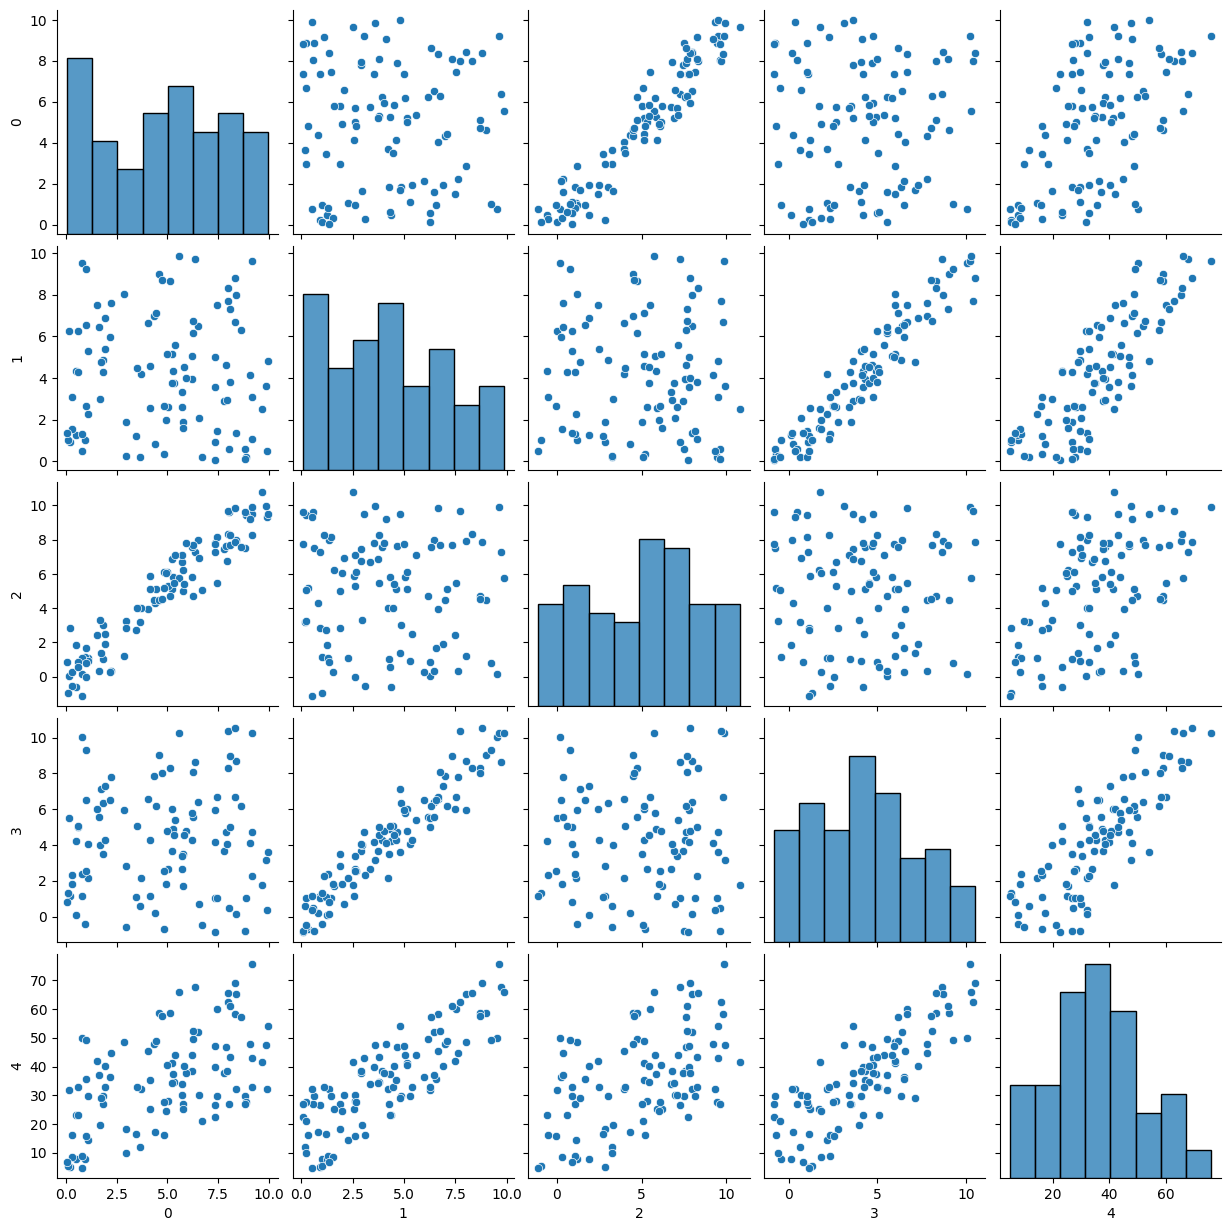

In [8]:
#UTILITY FUNCTION: 
def explore_data(x,y,iplot=True):

    #PRINT SHAPE
    print(x.shape)
    print(y.shape)

    #COMPUTE MERIT 
    print("merit =",merit(x,y,correlation="spearman")); 
    print("merit =",merit(x,y,correlation="pearson"))

    #PLOT
    if (iplot):
        sns.pairplot(pd.DataFrame(np.hstack((x,y.reshape(y.shape[0],1)))))
        plt.show()

# TEST YOUR CODE ABOVE
explore_data(x,y)

#### Aside: Combinatorics 

If the feature set is small then we can iterator over all possible combinations of feature subsets 

However,for large data-sets this becomes impractical.

This can be iteration can be done with the following python code


In [9]:
#modified from: https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements
import itertools
list1 = [*range(1,4+1)]; #print(list1)
for L in range(1,len(list1) + 1):
    for subset in itertools.combinations(list1, L):
        print(list(subset))

# EXPECTED 
#x1
#x2
#x3
#x4
#x1,x2 
#x1,x3 
#x1,x4 
#x2,x3 
#x2,x4
#x3,x4
#x1,x2,x3
#x1,x2,x4
#x1,x3,x4
#x1,x2,x3,x4

[1]
[2]
[3]
[4]
[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]


### ASSIGNMENT-2: 

* Given two matrices `x` and `y`, write a function that;
  
  * Iterates over all possible subsets combinations of the x features 

  * Computes the figure of merit for the subset

  * Keeps track of the maximum Merit and returns the optimal subset at the end

In [20]:
import itertools

def merit(x_subset, y):
    """
    Example merit function. Replace with the actual logic as needed.
    Here, we use a random score as a placeholder.
    """
    return np.random.rand()  # Placeholder for merit calculation

def maximize_CFS(x, y):
    """
    Iterate over all possible subsets of the features in x,
    compute the merit score for each subset, and return the subset data with the highest merit score.
    """
    num_features = x.shape[1]  # Ensure x is a 2D array
    best_score = -1
    best_subset_indices = None
    best_subset_data = None

    # Iterate over all subsets of features
    for r in range(1, num_features + 1):
        for subset in itertools.combinations(range(num_features), r):
            # Extract the subset of features
            x_subset = x[:, subset]
            # Calculate the merit score for the current subset
            score = merit(x_subset, y)

            # Update the best score and subset if necessary
            if score > best_score:
                best_score = score
                best_subset_indices = subset
                best_subset_data = x_subset

    return best_subset_data, best_subset_indices, best_score

# Generate random data (ensure x is 2D)
x = np.random.rand(100, 4) 
y = np.random.rand(100)

# Find the optimal subset
x_opt, optimal_indices, max_merit = maximize_CFS(x, y)
print("Optimal subset of features (indices):", optimal_indices)
print("Maximum Merit score:", max_merit)

# Explore the optimal feature set
def explore_data(x, y, iplot=True):
    """
    Function to explore the data (e.g., print shapes or perform other checks).
    """
    print("Shape of x:", x.shape)  # Confirm x is a 2D array
    print("Shape of y:", y.shape)  # Confirm y is 1D or compatible
    
# Call the explore_data function with the optimal feature subset
explore_data(x_opt, y)

Optimal subset of features (indices): (1,)
Maximum Merit score: 0.9673576355300401
Shape of x: (100, 1)
Shape of y: (100,)


In [17]:
# RUN SEARCH
x_opt=maximize_CFS(x,y)

In [21]:
# EXPLORE OPTIMAL FEATURE SET 
explore_data(x_opt,y) 

Shape of x: (100, 1)
Shape of y: (100,)


# MNIST

## ASSIGNMENT-3:

Write a training function that 

* given `x_train, y_train, x_test, y_test` does the following
* Trains a Gaussian Naive Bayes classifier on the training data
* Computes and prints the accuracy for both training and test set 

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import random

def train_GNB_model(x_train, y_train, x_test, y_test, i_print=False):
    """
    Trains a Gaussian Naive Bayes classifier and prints accuracy for both training and test sets.
    """
    # Initialize the Gaussian Naive Bayes model
    model = GaussianNB()
    
    # Fit the model using the training data
    model.fit(x_train, y_train)
    
    # Predict labels for the training set
    y_train_pred = model.predict(x_train)
    
    # Predict labels for the test set
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy for both training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print accuracy if specified
    if i_print:
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return train_accuracy, test_accuracy

#### Classification-2: MNIST Variance Threshold selection 

Run the following code to test the code you write above 

In [23]:
# DIGITS
from sklearn import datasets
(x,y)=datasets.load_digits(n_class=10, return_X_y=True, as_frame=False)

LABEL= 4


<Figure size 640x480 with 0 Axes>

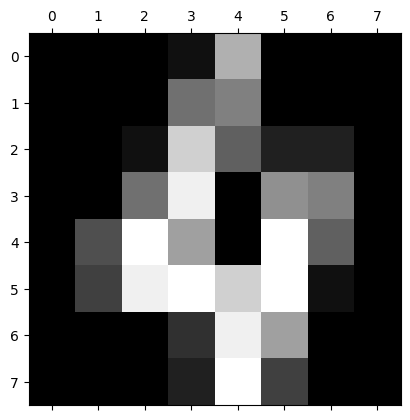

In [24]:
# PLOT ONE OF THE HAND-WRITTEN DIGITS 
import matplotlib.pyplot as plt
print("LABEL=",y[4])
plt.gray()
plt.matshow(x[4].reshape(8,8))
plt.show()

In [25]:
# SET INDICES FOR TRAIN/TEST SET
N=x.shape[0]
l = [*range(N)]       # indices
cut = int(0.7 * N)    # 80% of the list
random.shuffle(l)     # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:]  # last 20% of shuffled list

In [26]:
# COMPUTE UPPER AND LOWER LIMIT FOR VARIANCE ACCROSS SAMPLES
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0
42.72106450836808


## Assignment-4

In the cell below, do the following:

- **Define Threshold Grid:** Set `num_thresholds` to 30 and create an array of thresholds using `np.linspace`, spanning from the minimum to the maximum variance of the features (`x_var`).
- **Remove Edge Thresholds:** Remove the first and last two thresholds to avoid zero-variance cases, which can cause issues.
- **Initialize Lists:** Create empty lists (`num_features`, `train_accuracies`, `test_accuracies`) to store feature counts and model accuracies for each threshold.
- **Evaluate Full Feature Set:** 
  - Define training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) sets using `train_index` and `test_index`.
  - Train the model on the full feature set by calling `train_GNB_model` and store the resulting training and testing accuracies.
  - Record the number of features, training accuracy, and testing accuracy for the full feature set.
- **Loop Over Thresholds:**
  - For each threshold, initialize a `VarianceThreshold` object and apply it to select features from `x`.
  - Print the threshold and the number of features retained after selection.
  - Re-define `x_train` and `x_test` using the filtered features and call `train_GNB_model` to calculate model accuracy on the selected feature set.
- **Record Results:** Append the number of features, training accuracy, and testing accuracy for each threshold into the respective lists (`num_features`, `train_accuracies`, `test_accuracies`).



In [33]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Generate synthetic dataset (100 samples, 20 features)
x = np.random.rand(100, 20)  # Feature matrix
y = np.random.randint(0, 2, 100)  # Binary target variable

# Compute the variance of each feature
x_var = np.var(x, axis=0)

# Define the threshold grid using np.linspace
num_thresholds = 30
thresholds = np.linspace(np.min(x_var), np.max(x_var), num_thresholds)

# Remove edge thresholds to avoid zero-variance cases
thresholds = thresholds[1:-1]

# Initialize lists to store results
results = []  # This will store tuples of (threshold, train_accuracy, num_features)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train a model on the full feature set and record the results
model = GaussianNB()  # Initialize Gaussian Naive Bayes model
model.fit(x_train, y_train)  # Train the model

# Evaluate the model on training and testing sets
train_accuracy = accuracy_score(y_train, model.predict(x_train))

# Store the results for the full feature set
results.append((0, train_accuracy, x_train.shape[1]))  # 0 as a placeholder for "no threshold"

# Loop over each threshold in the grid
for threshold in thresholds:
    # Initialize VarianceThreshold with the current threshold
    selector = VarianceThreshold(threshold=threshold)
    x_train_filtered = selector.fit_transform(x_train)  # Apply feature selection on training data

    # Get the number of features retained after filtering
    num_features_retained = x_train_filtered.shape[1]
    
    # Skip the threshold if no features are retained
    if num_features_retained == 0:
        continue

    # Train a new model using the filtered features
    model = GaussianNB()
    model.fit(x_train_filtered, y_train)
    
    # Evaluate the model on the training set
    train_accuracy = accuracy_score(y_train, model.predict(x_train_filtered))

    # Store the results
    results.append((threshold, train_accuracy, num_features_retained))

# Print the final results in the desired format
for threshold, train_accuracy, num_features_retained in results:
    print(f"{threshold:.6f} {train_accuracy:.6f} {num_features_retained}")



0.000000 0.714286 20
0.066684 0.714286 18
0.067560 0.714286 18
0.068436 0.714286 18
0.069312 0.714286 18
0.070188 0.742857 17
0.071064 0.742857 17
0.071940 0.742857 17
0.072816 0.742857 17
0.073692 0.714286 15
0.074568 0.728571 13
0.075444 0.714286 12
0.076320 0.714286 12
0.077196 0.671429 11
0.078072 0.657143 9
0.078948 0.657143 9
0.079824 0.657143 8
0.080700 0.671429 7
0.081576 0.628571 6
0.082452 0.628571 6
0.083328 0.628571 6
0.084204 0.628571 6
0.085080 0.628571 6
0.085956 0.600000 5
0.086832 0.614286 4
0.087708 0.614286 4
0.088584 0.571429 2
0.089460 0.571429 1
0.090336 0.571429 1


## ASSIGNMENT-5: 

Describe in 100 to 200 words what the importance of the following plot is 

This chart shows the relationship between the number of features and the accuracy of the model on the training and test sets. The blue line represents training accuracy, while the red line represents test accuracy.

The importance of this chart lies in helping us understand the trade-off between model complexity and generalization ability. As the number of selected features increases, training accuracy usually improves. However, too many features can lead to overfitting, where the model performs well on the training data but poorly on unseen test data.

The red line (test accuracy) reflects the model's generalization ability. If test accuracy stabilizes or even decreases as the number of features increases, it indicates that the additional features do not provide useful information. Conversely, if test accuracy improves with an increasing number of features, it suggests that these features help enhance the model's predictive ability.

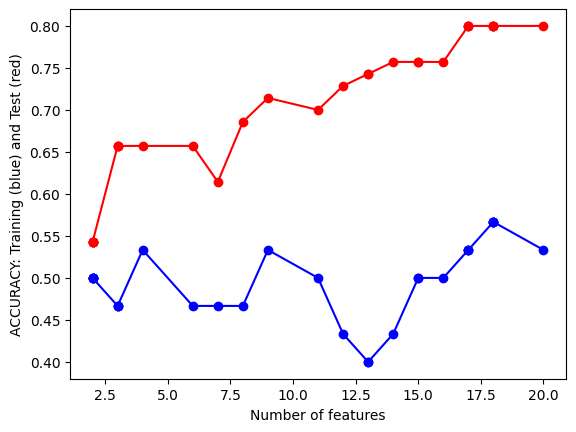

In [36]:
#PLOT-1
plt.plot(num_features,train_accuracies,'-or')
plt.plot(num_features,test_accuracies,'-ob')
plt.xlabel('Number of features')
plt.ylabel('ACCURACY: Training (blue) and Test (red)')
plt.show()
